<a href="https://colab.research.google.com/github/akshaypt7/covid_prediction_from_xray/blob/main/Covidnotcovid_Scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras as keras
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D , MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

In [ ]:
# Downloading raw data required for training 

# !gdown https://drive.google.com/uc?id=11EHCY23wGtIRHsfy-miRmesfkwpOlsBH

In [4]:
# Unzip the the file on the local instance

!unzip -qq /content/drive/MyDrive/Univ.ai/kaggle_transfer_learning_covid.zip

### Creating the Imagedataloaders

In [6]:
data_gen = ImageDataGenerator(rotation_range =30,width_shift_range=0.2,height_shift_range=0.2,rescale=1/255,
                              shear_range=0.2,horizontal_flip =True,fill_mode='nearest' , validation_split=0.2)

In [7]:
train_data_gen = data_gen.flow_from_directory('/content/kaggle_transfer_learning_covid/train',
                                              target_size=(150,150),
                                              batch_size=16,
                                              class_mode='categorical',
                                              subset='training')
valid_data_gen = data_gen.flow_from_directory('/content/kaggle_transfer_learning_covid/train',
                                              target_size=(150,150),
                                              batch_size=16,
                                              class_mode='categorical',
                                              subset='validation')

Found 168 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


#### Visualization

In [9]:


class_covid = {j:i for i,j in train_data_gen.class_indices.items()}
class_covid

{0: 'covid', 1: 'normal', 2: 'pneumonia'}

In [ ]:
# np.argmax([0,0,1])

2

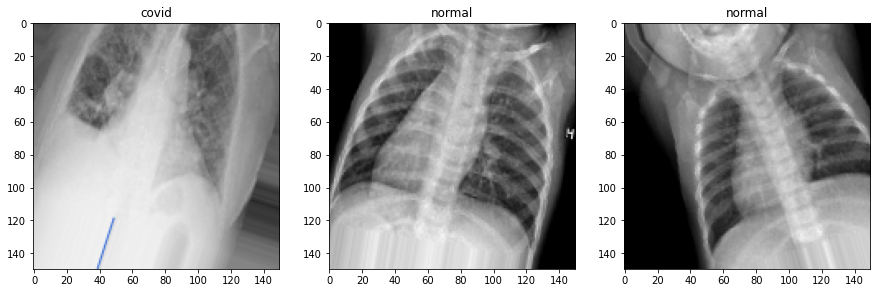

In [10]:
images = train_data_gen.next()
from matplotlib.pyplot import figure



fig,ax = plt.subplots(1,3,figsize=(15,15))

for i in range(3):
  ax[i].imshow(images[0][i]);
  ax[i].set_title(f'{class_covid[np.argmax(images[1][i])]}')






### Base Model

In [ ]:
base_model = Sequential()
base_model.add(Conv2D(32,3,padding='same', input_shape=(150,150,3), activation='relu'))
base_model.add(Conv2D(64,3,activation='relu'))
base_model.add(MaxPooling2D())
base_model.add(Conv2D(32,3,activation='relu'))

base_model.add(Flatten())
base_model.add(Dropout(0.5))
base_model.add(Dense(50,activation='relu'))
base_model.add(Dense(3,activation='softmax'))

In [ ]:
base_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
base_model.fit(train_data_gen,validation_data = valid_data_gen, steps_per_epoch =168//16, validation_steps=42//16 , epochs=10)

Epoch 1/10
10/10 [==============================] - 8s 821ms/step - loss: 1.0256 - accuracy: 0.5500 - val_loss: 0.9868 - val_accuracy: 0.6875
Epoch 2/10
10/10 [==============================] - 8s 815ms/step - loss: 1.0116 - accuracy: 0.5658 - val_loss: 0.8741 - val_accuracy: 0.6875
Epoch 3/10
10/10 [==============================] - 8s 809ms/step - loss: 0.9447 - accuracy: 0.5526 - val_loss: 0.8927 - val_accuracy: 0.6875
Epoch 4/10
10/10 [==============================] - 7s 751ms/step - loss: 0.9355 - accuracy: 0.5813 - val_loss: 0.8614 - val_accuracy: 0.5938
Epoch 5/10
10/10 [==============================] - 7s 706ms/step - loss: 0.9172 - accuracy: 0.6316 - val_loss: 0.7603 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 8s 785ms/step - loss: 0.9798 - accuracy: 0.6316 - val_loss: 0.9188 - val_accuracy: 0.6875
Epoch 7/10
10/10 [==============================] - 8s 820ms/step - loss: 0.8623 - accuracy: 0.6645 - val_loss: 0.8405 - val_accuracy: 0.8125
Epoch 

In [ ]:
base_model.fit(train_data_gen,validation_data = valid_data_gen, epochs=2)

Epoch 1/2
11/11 [==============================] - 8s 773ms/step - loss: 1.0294 - accuracy: 0.5060 - val_loss: 0.9562 - val_accuracy: 0.5714
Epoch 2/2
11/11 [==============================] - 7s 666ms/step - loss: 1.0064 - accuracy: 0.5655 - val_loss: 1.0157 - val_accuracy: 0.6429


### Transfer Learning

In [11]:
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [12]:
model = VGG16() # This has the top
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [21]:
model = VGG16(include_top=False, input_shape=(150,150,3)) # When include_top is zero we have no dense layers
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [22]:
output_model = Flatten()(model.layers[-1].output)
output_model = Dense(100,activation='relu')(output_model)
output_model = Dense(3,activation='softmax')(output_model)

In [23]:
final_model = Model(inputs=model.inputs,outputs=output_model)



In [24]:
final_model.compile(optimizer='adam',metrics =['accuracy'],loss='categorical_crossentropy')

In [26]:
final_model.fit(train_data_gen,epochs=20,validation_data=valid_data_gen, steps_per_epoch =168//16, validation_steps=42//16)

Epoch 1/20
10/10 [==============================] - 5s 505ms/step - loss: 0.7854 - accuracy: 0.6184 - val_loss: 0.7584 - val_accuracy: 0.6250
Epoch 2/20
10/10 [==============================] - 5s 481ms/step - loss: 0.8459 - accuracy: 0.6316 - val_loss: 0.7922 - val_accuracy: 0.6875
Epoch 3/20
10/10 [==============================] - 5s 501ms/step - loss: 0.7300 - accuracy: 0.6974 - val_loss: 0.5895 - val_accuracy: 0.6875
Epoch 4/20
10/10 [==============================] - 5s 493ms/step - loss: 0.7378 - accuracy: 0.6645 - val_loss: 1.0667 - val_accuracy: 0.6562
Epoch 5/20
10/10 [==============================] - 5s 497ms/step - loss: 0.6783 - accuracy: 0.7237 - val_loss: 0.6962 - val_accuracy: 0.7188
Epoch 6/20
10/10 [==============================] - 5s 500ms/step - loss: 0.6124 - accuracy: 0.7237 - val_loss: 0.7687 - val_accuracy: 0.6562
Epoch 7/20
10/10 [==============================] - 5s 474ms/step - loss: 0.7056 - accuracy: 0.7039 - val_loss: 0.7172 - val_accuracy: 0.6875
Epoch 

### Transfer learning with improvements in LR and selecting last few layers only for training

In [84]:
model = VGG16(include_top=False, input_shape=(150,150,3)) # When include_top is zero we have no dense layers
# model.summary()

In [85]:
for layer in model.layers[-5:] :
      layer.trainable = True

In [86]:
output_model = model.output
output_model = Flatten()(output_model)
output_model = Dense(3024,activation='relu')(output_model)
output_model = Dense(1000,activation='relu')(output_model)
output_model = Dense(100,activation='relu')(output_model)
output_model = Dense(3,activation='softmax')(output_model)

In [87]:
final_model = Model(inputs=model.inputs,outputs=output_model)



In [88]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics =['accuracy'],loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [89]:
history = final_model.fit(train_data_gen,epochs=20,validation_data=valid_data_gen, steps_per_epoch =168//16, validation_steps=42//16) 
# with just training last few layers of the VGG model

Epoch 1/20
10/10 [==============================] - 7s 570ms/step - loss: 1.1681 - accuracy: 0.3750 - val_loss: 0.9848 - val_accuracy: 0.5938
Epoch 2/20
10/10 [==============================] - 5s 510ms/step - loss: 1.0959 - accuracy: 0.5592 - val_loss: 0.9249 - val_accuracy: 0.6562
Epoch 3/20
10/10 [==============================] - 5s 497ms/step - loss: 0.8559 - accuracy: 0.6250 - val_loss: 0.6373 - val_accuracy: 0.8125
Epoch 4/20
10/10 [==============================] - 5s 528ms/step - loss: 0.6847 - accuracy: 0.7237 - val_loss: 0.6265 - val_accuracy: 0.7188
Epoch 5/20
10/10 [==============================] - 5s 486ms/step - loss: 0.6800 - accuracy: 0.6908 - val_loss: 1.1285 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 5s 495ms/step - loss: 0.6811 - accuracy: 0.7039 - val_loss: 0.4527 - val_accuracy: 0.8750
Epoch 7/20
10/10 [==============================] - 5s 496ms/step - loss: 0.5384 - accuracy: 0.8289 - val_loss: 0.4266 - val_accuracy: 0.8438
Epoch 